In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/luminar/dataset/Mall_Customers.csv')
import warnings
warnings.filterwarnings('ignore')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Genre']=le.fit_transform(df['Genre'])

In [5]:
from sklearn.preprocessing import normalize
data=normalize(df)
data

array([[0.02177518, 0.02177518, 0.41372838, 0.32662767, 0.84923193],
       [0.02351802, 0.01175901, 0.24693923, 0.17638516, 0.95247988],
       [0.11330844, 0.        , 0.75538957, 0.60431166, 0.22661687],
       [0.04875874, 0.        , 0.28036275, 0.19503495, 0.93860571],
       [0.09325048, 0.        , 0.57815298, 0.31705163, 0.74600385],
       [0.07393896, 0.        , 0.27110953, 0.20949373, 0.93656021],
       [0.17316974, 0.        , 0.86584872, 0.44529363, 0.14843121],
       [0.08100669, 0.        , 0.23289423, 0.18226505, 0.95182858],
       [0.13345421, 0.01482825, 0.94900772, 0.28173667, 0.04448474],
       [0.1236076 , 0.        , 0.3708228 , 0.23485444, 0.88997472],
       [0.15301409, 0.01391037, 0.93199493, 0.26429707, 0.19474521],
       [0.11175006, 0.        , 0.32593767, 0.17693759, 0.92193798],
       [0.20160491, 0.        , 0.89946807, 0.3101614 , 0.23262105],
       [0.16613773, 0.        , 0.28480754, 0.23733962, 0.91375753],
       [0.32245019, 0.02149668, 0.

In [6]:
newdf = pd.DataFrame(data,columns=df.columns)

In [7]:
newdf

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.021775,0.021775,0.413728,0.326628,0.849232
1,0.023518,0.011759,0.246939,0.176385,0.952480
2,0.113308,0.000000,0.755390,0.604312,0.226617
3,0.048759,0.000000,0.280363,0.195035,0.938606
4,0.093250,0.000000,0.578153,0.317052,0.746004
...,...,...,...,...,...
195,0.798293,0.000000,0.142552,0.488751,0.321761
196,0.821590,0.000000,0.187673,0.525484,0.116774
197,0.797888,0.004030,0.128952,0.507747,0.298200
198,0.814323,0.004092,0.130946,0.560614,0.073657


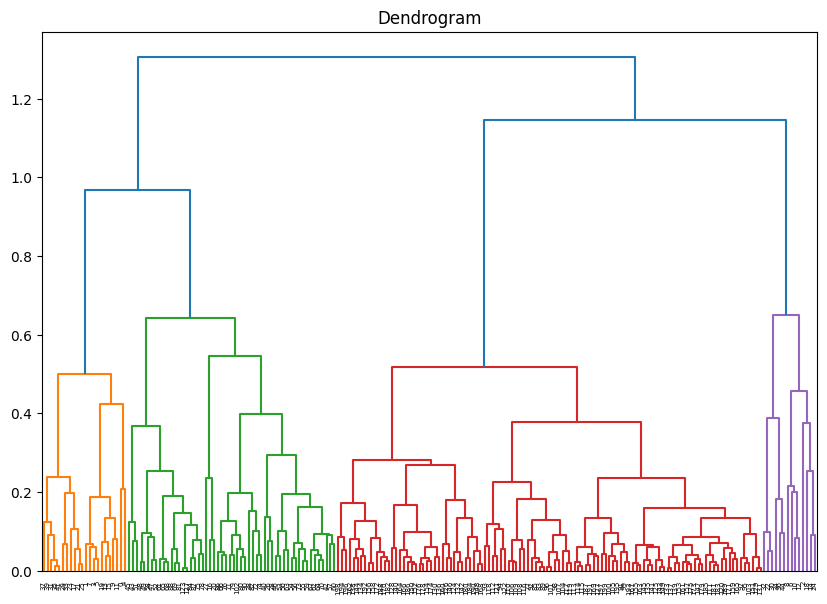

In [8]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend=shc.dendrogram(shc.linkage(newdf,method='complete'))

In [9]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster.fit_predict(newdf)

array([2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

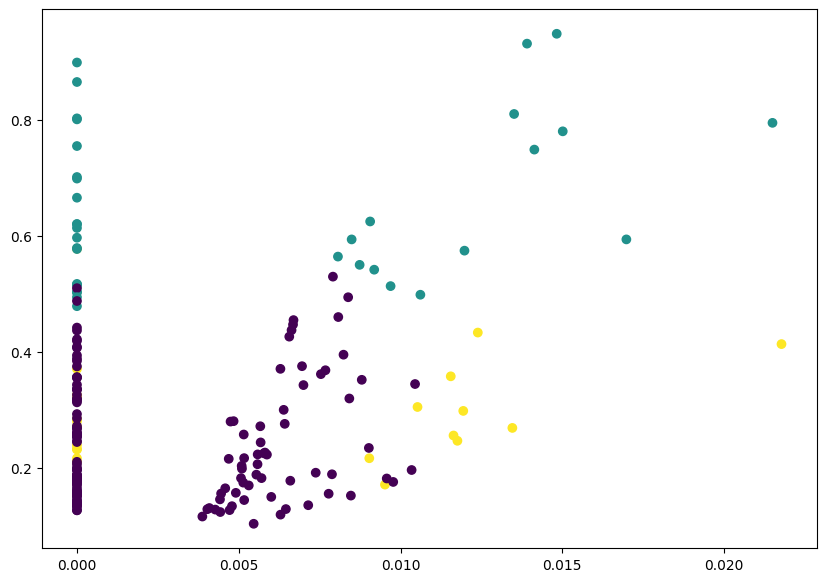

In [10]:
plt.figure(figsize=(10,7))
plt.scatter(newdf['Genre'],newdf['Age'],c=cluster.labels_)